# Análise Exploratória dos Dados

Nesse notebook, a ideia é aprofundar na análise exploratória dos dados. Até então, tinhamos apenas dado uma rápida olhada na estrutura dos mesmos para conseguir fazer o ETL. Agora é explorar a fundo apenas no conjunto de dados de treino, para evitar o *data snooping bias*.

## Estudo dos atributos e suas propriedades

In [1]:
# Importar os pacotes necessários
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Código que transforma o csv em um dataframe pandas
df_train = pd.read_csv('train_set.csv')

In [2]:
# 1. Verificar as 5 primeiras linhas do conjunto de dados
pd.set_option("display.max_columns", None)
df_train.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2022-06-05,within an hour,1.0,1.00,f,t,t,-23.006950,-43.483400,Entire home/apt,8,2.0,3.0,3.0,370.0,1,365,t,30,60,83,357,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,0,NaN
1,2021-11-25,within an hour,1.0,0.83,f,t,t,-22.968893,-43.188961,Entire home/apt,6,2.0,2.0,2.0,110.0,3,1125,t,0,19,44,319,1,5.0,5.0,5.00,5.0,5.0,5.0,5.0,f,0,1.0
2,2018-04-29,within an hour,1.0,1.00,f,t,t,-22.983290,-43.193770,Entire home/apt,7,3.5,3.0,3.0,1093.0,2,30,t,28,58,77,257,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,0,NaN
3,2018-03-11,within an hour,0.6,1.00,f,t,f,-22.965670,-43.474900,Private room,3,1.5,1.0,2.0,300.0,1,7,t,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,NaN
4,2017-01-04,within an hour,1.0,1.00,f,t,t,-22.913240,-43.212600,Hotel room,4,NaN,1.0,3.0,206.0,3,90,t,9,9,9,180,3,5.0,5.0,4.67,5.0,5.0,5.0,5.0,t,0,0.1


In [3]:
# 2. Verificar o tipo dos dados
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19904 entries, 0 to 19903
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   host_since                                   19811 non-null  object 
 1   host_response_time                           15751 non-null  object 
 2   host_response_rate                           15751 non-null  float64
 3   host_acceptance_rate                         16069 non-null  float64
 4   host_is_superhost                            19811 non-null  object 
 5   host_has_profile_pic                         19811 non-null  object 
 6   host_identity_verified                       19811 non-null  object 
 7   latitude                                     19904 non-null  float64
 8   longitude                                    19904 non-null  float64
 9   room_type                                    19904 non-null  object 
 10

In [4]:
# 3. Verificar a % de valores ausentes nas colunas

def missing_pct(df):
    # Calculate percentage of missing for each column
    s_missing = df.isnull().sum() * 100 / df.shape[0]
    # Convert the series back to data frame
    df_missing = pd.DataFrame(s_missing).round(2)
    # Reset and rename the index
    df_missing = df_missing.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_Percentage (%)'
                    }
                )
    # Sort the data frame
    df_missing = df_missing.sort_values('Missing_Percentage (%)', ascending=False)
    return df_missing

# chamar e executar a função
missing_pct(df_train)

,Column,Missing_Percentage (%)
29,review_scores_value,31.68
28,review_scores_location,31.68
27,review_scores_communication,31.68
26,review_scores_checkin,31.68
25,review_scores_cleanliness,31.68
24,review_scores_accuracy,31.68
32,reviews_per_month,30.53
23,review_scores_rating,30.53
2,host_response_rate,20.87
1,host_response_time,20.87


In [5]:
# 4. Verificar o resumo estatístico dos dados
df_train.describe()

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month
count,15751.000000,16069.000000,19904.000000,19904.000000,19904.000000,19865.000000,18825.000000,19709.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,13828.000000,13598.000000,13598.000000,13598.000000,13598.000000,13598.000000,13598.000000,19904.000000,13828.000000
mean,0.856612,0.769511,-22.966573,-43.248466,4.150975,1.635389,1.698486,2.615353,739.202070,5.444333,567.933230,19.152130,40.922277,60.280145,214.842092,16.865203,4.670706,4.787494,4.697461,4.874515,4.853945,4.855939,4.666698,0.072498,0.806933
std,0.281896,0.304759,0.035681,0.098490,2.452230,1.051977,1.105626,2.261508,4939.381449,27.044737,630.210832,11.909466,22.799499,32.215777,131.585376,37.227576,0.756859,0.451074,0.509116,0.366586,0.399598,0.359636,0.482930,0.572985,1.005276
min,0.000000,0.000000,-23.073750,-43.770380,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.010000
25%,0.890000,0.670000,-22.984742,-43.301068,2.000000,1.000000,1.000000,1.000000,179.000000,1.000000,50.000000,7.000000,23.000000,38.000000,89.000000,0.000000,4.670000,4.760000,4.620000,4.890000,4.860000,4.860000,4.570000,0.000000,0.130000
50%,1.000000,0.910000,-22.972665,-43.195830,4.000000,1.000000,1.000000,2.000000,300.000000,2.000000,365.000000,25.000000,53.000000,75.000000,213.000000,3.000000,4.890000,4.940000,4.865000,5.000000,5.000000,5.000000,4.790000,0.000000,0.450000
75%,1.000000,1.000000,-22.953710,-43.186060,5.000000,2.000000,2.000000,3.000000,600.000000,4.000000,1125.000000,30.000000,59.000000,87.000000,356.000000,15.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,1.100000
max,1.000000,1.000000,-22.749690,-43.104400,16.000000,20.000000,47.000000,91.000000,591723.000000,1125.000000,47036.000000,30.000000,60.000000,90.000000,365.000000,534.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,18.740000


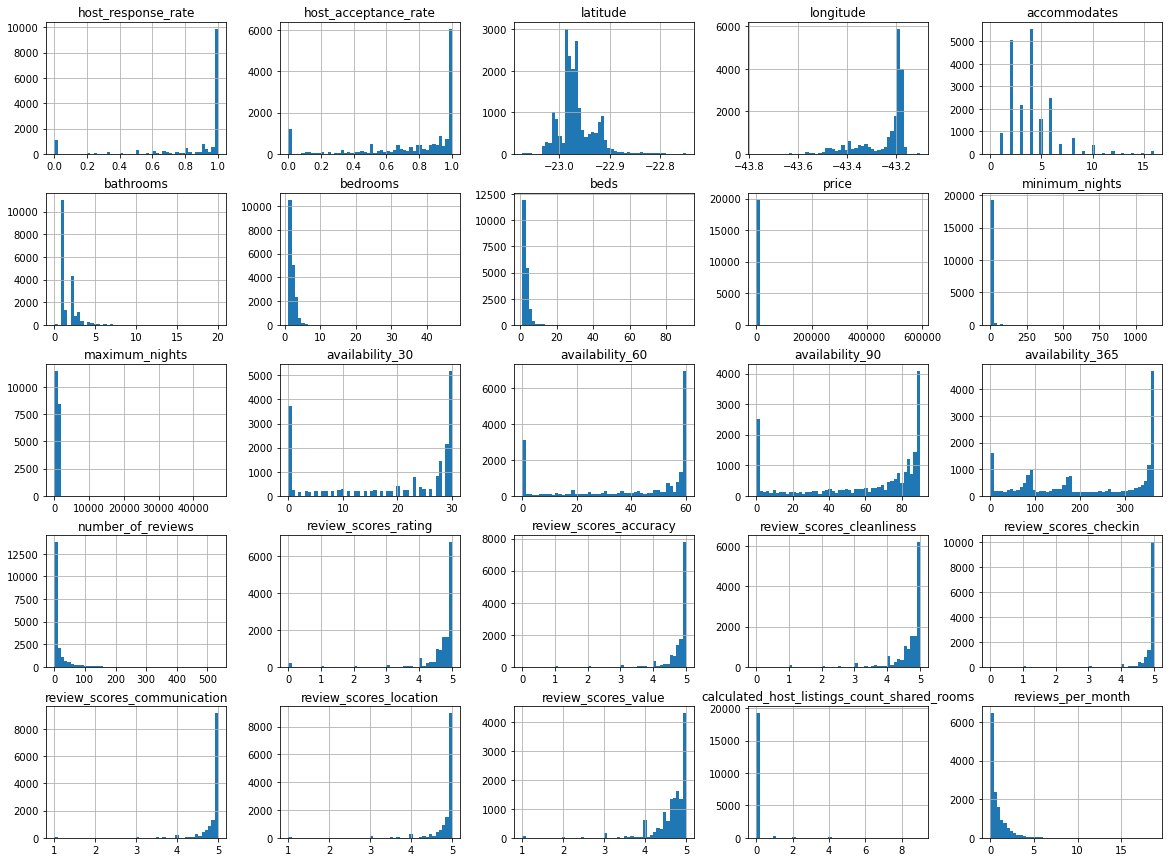

In [6]:
# 5. Verificar a distribuição dos dados com histograma
df_train.hist(bins = 50, figsize=(20,15))
plt.show()

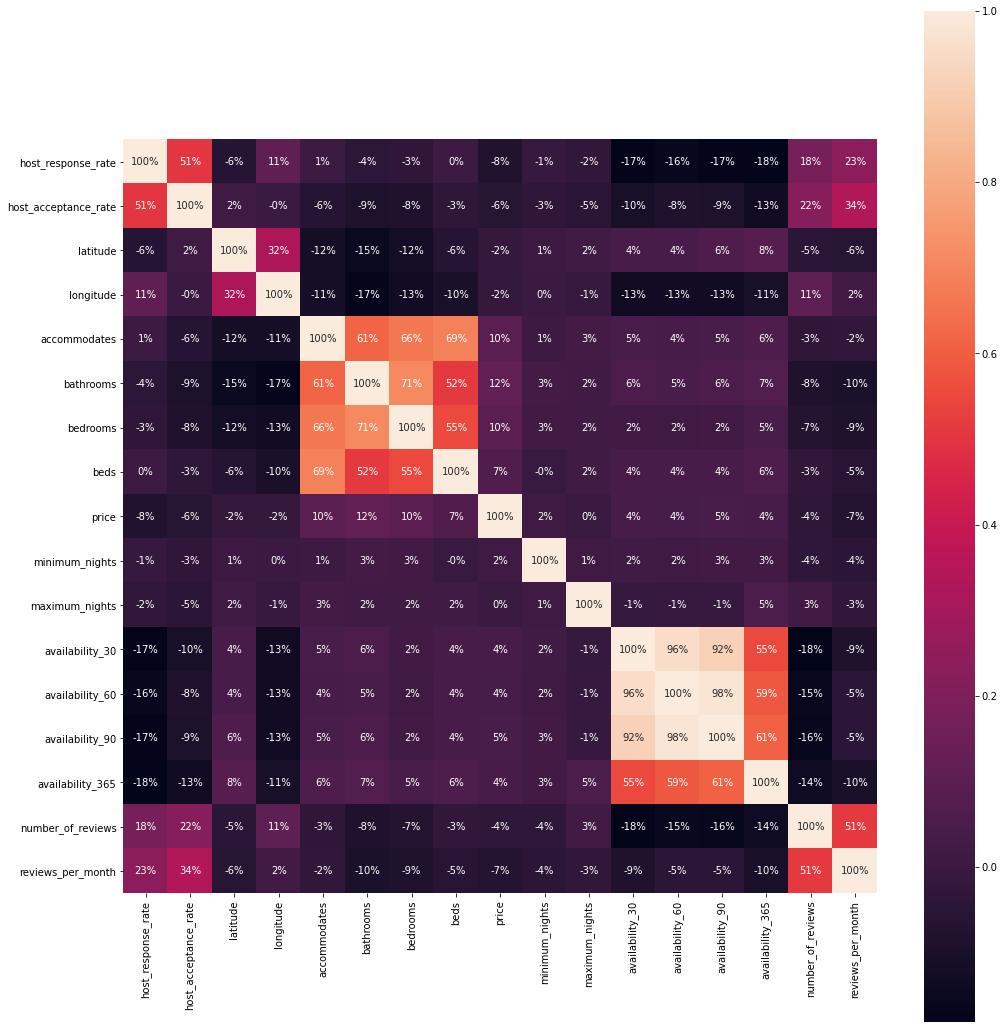

In [7]:
# 6. Buscando correlações com pearson
df_train_pearson = df_train.drop(['review_scores_rating', 'review_scores_accuracy',
                                  'review_scores_cleanliness', 'review_scores_checkin',
                                  'review_scores_communication', 'review_scores_location',
                                  'review_scores_value', 'calculated_host_listings_count_shared_rooms',
                                  ], axis=1) # Removendo as variáveis com distribuição discreta
corr = df_train_pearson.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, fmt='.0%', annot=True, square=True)
plt.tight_layout()

Excluímos algumas colunas da matriz de correlação, pois, essas colunas eram relativos a dados discretos e não contínuos. A correlação de pearson é mais adequada apenas a dados contínuos correlacionados a outros dados contínuos.

Essa matriz nos traz, essencialmente, 2 informações muito relevantes:
1. A correlação das variáveis independentes com a variável dependente
2. A multicolinearidade entre as variáveis independentes

Nesse caso, essa matriz, pode nos dizer bastante sobre as nossas variáveis e o quão interessantes elas são para o modelo. Vamos, por esse método da correlação fazer uma pré-seleção de variáveis do nosso modelo, mantendo apenas as variáveis que possuem alta correlação com a variável dependente (por, supostamente serem boas preditoras), e também, mantendo apenas as que não são colineares.

Como era de se esperar, vimos algumas variáveis que são colineares. Também vimos, que as nossas variáveis possuem pouca relação linear com a variável alvo, o que é ruim para o modelo. Vamos plotar um gráfico de dispersão das variáveis que mais possuem relação linear com a variável alvo.

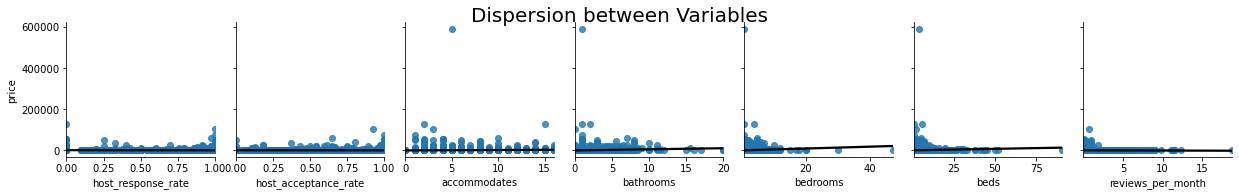

In [17]:
# 7. Using pairplot to check relationships between variables
ax = sns.pairplot(df_train, y_vars='price', x_vars=['host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 
                                                    'bedrooms', 'beds', 'reviews_per_month'], 
                                                    kind='reg', plot_kws={'line_kws':{'color':'black'}})

ax.fig.suptitle('Dispersion between Variables', fontsize=20, y=1.05)
plt.show()

Vemos que a relação linear é quase inexistente. Essas são as variáveis que possuem maior correlação com a alvo (price) e mesmo assim deixam muito a desejar nas relações lineares. Possivelmente essas variáveis não são boas preditoras. De qualquer forma, vamos mantê-las, agregar algumas variáveis categóricas que ainda temos que analisar e fazer uma seleção de variáveis na etapa de *preparação dos dados*.

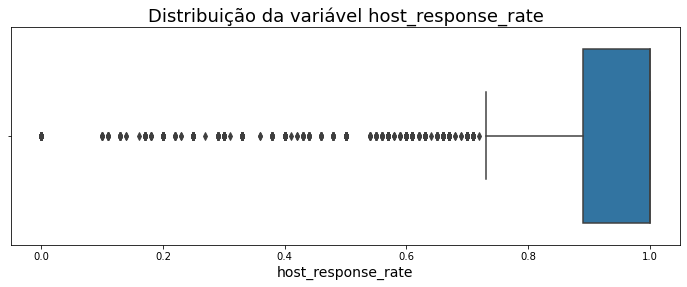

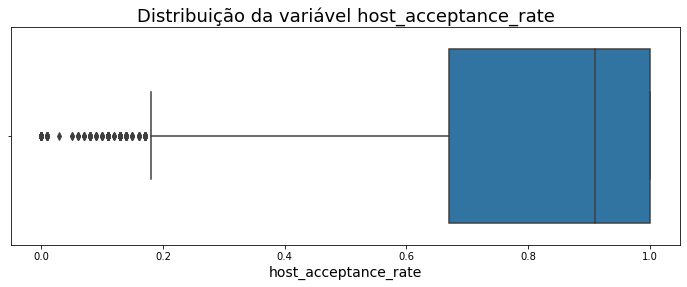

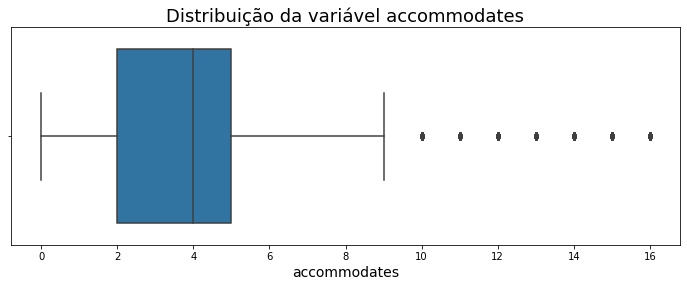

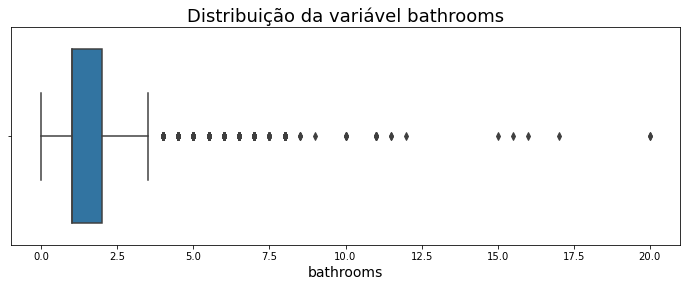

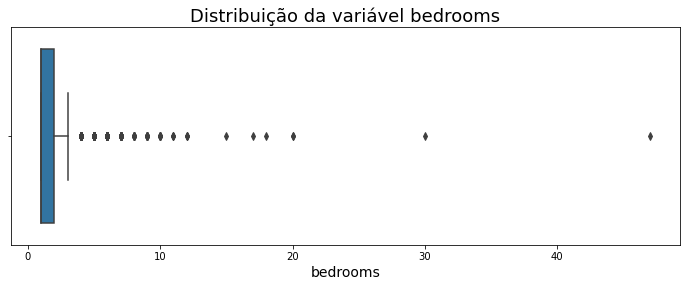

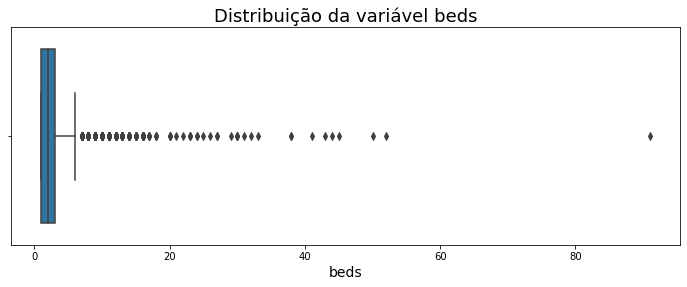

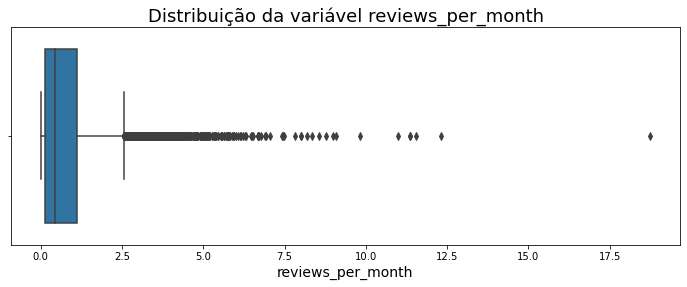

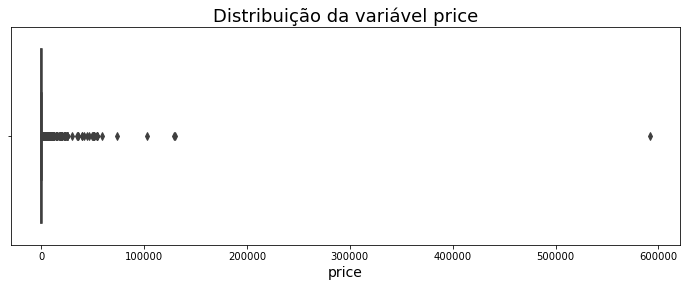

In [22]:
# 8. Boxplot para verificar melhor a distribuição da variável alvo, além de outliers
columns = ['host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 
           'bedrooms', 'beds', 'reviews_per_month', 'price']

for i in columns:
    ax = sns.boxplot(x = i, data = df_train, orient = 'h')
    ax.figure.set_size_inches(12, 4)
    ax.set_title('Distribuição da variável ' + i, fontsize=18)
    ax.set_xlabel(i, fontsize=14)
    plt.show()

In [27]:
# 9. Verificar os valores únicos das variáveis que precisarão da transformação "one-hot"
qualitative_columns = ['host_response_time', 'room_type', 'instant_bookable', 'host_is_superhost', 'host_has_profile_pic',
                       'host_identity_verified', 'has_availability']

for i in qualitative_columns:
    print(df_train[i].unique())

['within an hour' nan 'within a few hours' 'a few days or more'
 'within a day']
['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
['t' 'f']
['f' 't' nan]
['t' nan 'f']
['t' 'f' nan]
['t' 'f']


## Identificar transformações promissoras

Uma transformação que podemos aplicar nesse conjunto de dados, é criar uma nova coluna a partir da coluna "host_since". Podemos pegar a data atual (do dia de hoje) e subtrair da data da coluna para termos a quantidade de dias que o respectivo host está no Airbnb e verificar se esse atributo é relevante para a predição do "price".